# TP : Entraînez-vous à entraîner un algorithme de Machine Learning !

## Preprocess

In [29]:
data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
## plot : 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 5]
## stat / model : 
from sklearn.model_selection import train_test_split


   price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0


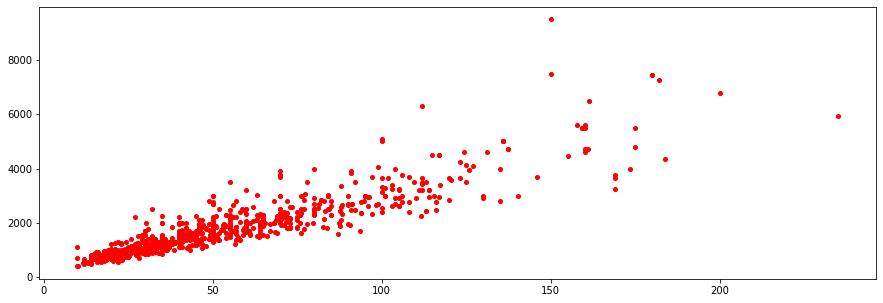

In [31]:
### EXTRACTION DATA ###
# On charge le dataset
house_data = pd.read_csv(data_path+'house_data_complete.csv')
print(house_data.head(3))

# OUTLIERS
house_data = house_data[house_data['price'] < 10000]
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.show()


Construct X matrix : 

$ X = \begin{pmatrix}
1 & loyer & arr_1(1) & arr_2(1) & \dots & arr_12(1)\\
& & &\dots & &  \\
1 & loyer & arr_1(i) & arr_2(i) & \dots & arr_12(i) \\
& & & \dots & &\\
1 & loyer & arr_1(n) & arr_2(n) & \dots & arr_12(n) 
\end{pmatrix} 
$

Where arr_k(i) is a boolean variable equals to 1 if the $i^{th}$ appartement is the $k^{th}$ arrondissement, 0 otherwise. 

So, we first need to construct the 0-1 submatrice size $k \times n$, denoted A, containing the information about arrondissement. We will first construct it with a loop and then we will use pandas.Dataframe to do it more properly :

In [63]:
## by hand method : 

K = np.int(max(house_data["arrondissement"]))
n = house_data.shape[0]
A = np.zeros((n,K))

for k in range(K): 
    A[house_data["arrondissement"]==k,k]=1

TODO test unitaire : vérifier que sum(sum(A))==n

In [83]:
## with pandas routine : 

A = pd.get_dummies(house_data,prefix="arr",columns = {'arrondissement'})

In [34]:

house_data.groupby("arrondissement")


In [ ]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values, house_data['arrondissement']]).T


y = np.matrix(house_data['price']).T
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)